
## Parte 1- Carga del Dataset

### **Introducción**
Este proyecto explora principalmente la relación existente entre la calidad del vino y las variables fisicoquímicas y sensoriales del vino (acidez fija; acidez volátil; ácido cítrico; azúcar residual; cloruros; dióxido de sulfuro libre; total dióxido de sulfuro; densidad; pH; sulfatos; alcohol). Para la exploración y el análisis de los datos se utilizó gráficos (como seaborn y ggplot), y varios algoritmos de aprendizaje automático para determinar qué propiedades fisicoquímicas poseen un mayor impacto en la calidad de un vino.

Para el desarrollo del proyecto se ha utilizado el Dataset (winequalityX.csv) sobre diferentes muestras de vino. Este dataset ha sido obtenido de la página https://www.kaggle.com/, con própositos de aprendizaje, y consta de 6497 filas y 13 columnas de atributos physicoquímicos (Ej: pH) y sensoriales (calidad percibida). Los valores de calidad de este dataset están basados en la media de al menos 3 evaluaciones hechas por expertos, donde cada experto calificó la calidad del vino entre 0 (muy malo) y 10 (excelente). 

####**Entorno de Desarrollo**

El entorno de trabajo para el desarrollo del código y elaboración del proyecto ha sido la plataforma Google Colaboratory, no obstante; el correcto funcionamiento del código también se ha validado en el entorno de la máquina virtual facilitada por la escuela Kschool (Jupyter Notebook).

Los notebooks subidos serán los validados desde la máquina virtual, no obstante, se dejará comentado el código utilizado en la fase de desarrollo desde la plataforma google colaboratory.






In [0]:
# Instalando librerias
!pip install seaborn --upgrade catplot

In [0]:
# Cargando otras librerias
import pandas as pd
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Autenticación y autorización en google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


    100% |████████████████████████████████| 993kB 24.7MB/s 


In [0]:
# Carga del Fichero desde GoogleDrive
file_id = '1rWjes9InpCzyJp-Rx4rT1GETycQhVjSY'                
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("winequalityX.csv")  


In [5]:
!ls

adc.json  sample_data  winequalityX.csv


In [7]:
# Carga del Dataset winequalityX.csv
wineX = pd.read_csv('winequalityX.csv')

# Obtenemos una muestra de 20 registros
wineX.head(20)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


**Comentario:** Tras la fase de carga del Dataset, nos encontramos con una serie de datos numéricos y categóricos. Vamos a realizar una serie de comprobaciones sencillas como es la integridad de los datos para ver si hay valores nulos o NaN

In [9]:
# Comprobamos el número de filas y columnas
wineX.shape

(6497, 13)

In [8]:
# Comprobamos la estructura del Data Set y que no haya ningún valor nulo o 
# NaN dentro del Dataset
wineX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [10]:
#Obtenemos la descripción de los campos de las columnas
wineX.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

En total, tenemos 13 características numéricas que incluyen tanto las características categóricas como las numéricas. La variable objetivo es el 'quality' (Calidad del vino), que puede ser buena o mala según el valor que tenga del 0 al 10.


In [66]:
#Revisamos los valores NA para cada columna
wineX.isna().sum() 

Tipo                       0
Acidez_Fija               10
Acidez_Volatil             8
Acido_Citrico              3
Azucar_Residual            2
Sal                        2
Dioxido_Sulfuro_Libres     0
Dioxido_Sulfuro_Total      0
Densidad                   0
pH                         9
Sulfatos                   4
Alcohol                    0
Calidad                    5
dtype: int64

A pesar de encontrarse valores de Cero '0' para las columnas: Ácidez_Fija; Ácidez_Volátil; Ácido_Cítrico; Azúcar_Residual;  Sal; pH; y Sulfatos, los mismos están dentro de los posibles valores a obtenerse para esas características, por tanto los dejaremos.


**Comentario**: El Dataset que se utilizará en los tratamientos de la parte 2 del proyecto será el "winequalityX.csv".


## Parte 2- Exploración y Análisis de Datos

### **Introducción**:

En esta parte segunda parte, se realizarán las modificaciones necesarias al dataset para adaptarlo a las necesidades del proyecto.






**Términos Enológicos como variables del dataset y su significado: **

   **fixed acidity:** Es el conjunto de ácidos naturales procedentes de la uva (tartárico, málico, cítrico y succínico) o formados en la fermentación maloláctica (láctico). En general, los ácidos (acidez fija) son preservantes naturales del vino y ayudan a mantener el color y las cualidades aromáticas del mismo.

   **volatile acidity:** Es el conjunto de ácidos formados durante la fermentación o como consecuencia de alteraciones microbianas; su valor es un índice de la degradación del vino. Estos ácidos son: ácido acético, ácido propionico, ácido butírico y ácido sulfúrico; no obstante el más importante es el ácido acético, síntoma de la transformación del vino en vinagre. 
    Si la acidez volátil, presente en todos los vinos, es muy elevada el vino se picará y avigranará con el paso del tiempo. Es conveniente que la acidez volatil de un vino sea lo más baja posible.
    El contenido en acidez volátil no puede ser superior a: a) 18 miliequivalentes por litro para los mostos de uva parcialmente fermentados, b) 18 miliequivalentes por litro para los vinos blancos y rosados, c) 20 miliequivalentes por litro para los vinos tintos.

   **citric acid:** En pequeñas cantidades este ácido puede añadir frescor y sabor a los vinos (es un ácido fijo).

   **residual sugar:** Durante la fermentación, y por acción de las levaduras, el azucar (glucosa + fructosa) se transforma en alcohol etílico, anhídrido carbónico y otras muchas sustancias que caracterizan al vino. Cuando la fermentación es prácticamente total se dice que el vino es seco, pero lo normal es que en todo vino quede cierta cantidad de azúcares sin fermentar, denominados azúcares residuales. 
    
   **chlorides:** Cantidad de sal en el vino.

   **free sulfur dioxide:** Previene del crecimiento microbial y de la oxidación del vino. La oxidación enturbia sus colores característicos (tornándolos en amarillos intensos e, incluso, marrones. Por lo que respecta al gusto, al beberlo notaremos sabores más secos y ásperos, incluso amargos en algunos casos.

   **total sulfur dioxide:** Suma de concentraciones libres y amarradas de S02; concentraciones de dioxodo de sulfuro libres superiores a 50 ppm se vuelven evidentes en el sabor y olor.

   **density:** densidad del vino, suele ser similar al del agua dependiendo de la concentración de azucar y de alcohol.

   **pH:** Describe cómo de ácido o básico es el vino: 0 (muy ácido) a 14 (muy básico). La mayoría de vinos se encuentra en la escala 3-4.

   **sulphates:** Actua como un antimicrobial y antioxidante. Un agua con una cantidad de sulfatos inferior a 250mg/l se considera en este aspecto un agua de calidad y con valores superiores a 400mg/l insalubre.

   **alcohol:** cantidad de alcohol del vino. Tras el agua, es el componente más abundante en el vino y el que lo caracteriza. Se produce por la transformación de los azúcares del mosto durante la fermentación. La riqueza alcohólica de un vino se mide en porcentaje en volumen o grado y en la etiqueta se expresa con la fórmula % vol. Significa que un vino de 12 grados (12%vol) contiene un 12% de alcohol puro.

   **quality:** calidad del vino entre 0 y 10.



**Comentario:** Con el objetivo de poder realizar una mejor comprensión en la fase de análisis, se modificarán los nombres de las columnas para adaptarlas a la terminología española.

In [0]:
# Renombramos los nombres de las columnas para adaptarlas 
# a los términos enológicos en español

wineX.rename(columns=
 {'type':'Tipo','fixed acidity':'Acidez_Fija', 
  'volatile acidity':'Acidez_Volatil','citric acid':'Acido_Citrico',
  'residual sugar':'Azucar_Residual','chlorides':'Sal',
  'free sulfur dioxide':'Dioxido_Sulfuro_Libres','total sulfur dioxide':'Dioxido_Sulfuro_Total',
  'density':'Densidad',
  'pH':'pH','sulphates':'Sulfatos',
  'alcohol':'Alcohol','quality':'Calidad'}, inplace=True)

In [16]:
# Comprobamos los cambios realizados
wineX.head(20)

,Tipo,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Sal,Dioxido_Sulfuro_Libres,Dioxido_Sulfuro_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [17]:
# Actualizamos los valores de las columnas con el fin de adaptarlos 
# a las necesidades del proyecto
wineX.replace({'Tipo' : "white"}, "Blanco", inplace=True)
wineX.replace({'Tipo' : "red"}, "Rojo", inplace=True)

#Comprobamos los resultados
wineX.head()

,Tipo,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Sal,Dioxido_Sulfuro_Libres,Dioxido_Sulfuro_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,Blanco,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,Blanco,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,Blanco,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,Blanco,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,Blanco,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [18]:
# Obtenemos un resumen estadistico
wineX.describe()
# El 50% del cuantil es en realidad la mediana del conjunto de datos

,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Sal,Dioxido_Sulfuro_Libres,Dioxido_Sulfuro_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


**Comentarios:** Si miramos los datos obtenidos, podemos notar que:

- El valor promedio es mayor que el valor de la mediana (50%) para casi todas las columnas.
- Existente una diferencia notoriamente grande entre el 75% y el valor máximo para las columnas como: Azúcar_Residual, Sal, Dioxido_Sulfuro_Libres, y Dioxido_Sulfuro_Total.

Por tanto, las observaciones anteriores sugieren que existen valores extremos (outliers) en nuestro conjunto de datos. 

## Análisis general de todas las variables

Graficaremos algunas variables para observar mejor como están distribuidas y relacionadas entre sí.


In [0]:
# Librerias a emplear
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 

**Calidad:**

In [19]:
# Posibles valores que tiene la columna 'Calidad' 
wineX.Calidad.unique()


array([6, 5, 7, 8, 4, 3, 9])

In [20]:
# Observamos la manera en la que están agrupados
wineX.Calidad.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: Calidad, dtype: int64

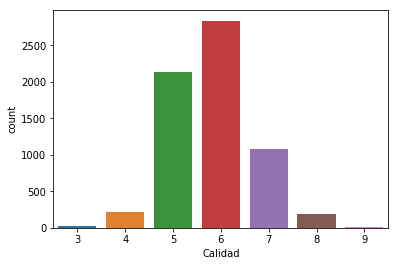

In [24]:
#Graficamos para ver mejor como es la distribución
sns.countplot(wineX['Calidad'])

**Comentarios:** Podemos ver que
- La variable dependiente 'Calidad' es discreta y de naturaleza categórica (varían de 3 a 9, donde 3 es malo y 9 es bueno).
- Se observa una calificación de calidad entre 3 y 9, es decir; los grados de calidad 1, 2 y 10 no aparecen en el dataset.
- La mayor concentración de la calificación de calidad se concentra de 5 a 7, y la menor se concentra en las puntuaciones de 3 y 9. Las clases están ordenadas pero no están equilibradas (por ejemplo, hay más vinos normales que excelentes o pobres).
- Dado que la distribución de las muestras para los diferentes valores de calidad no es uniforme, se podría utilizar algún algoritmo de detección de 'Outliers' y retirarlos de nuestro dataset, o no eliminar ningún valor pero sí tenerlo en cuenta al dividir el conjunto de datos de entrenamiento y de validación.
- En este caso no eliminaremos los outliers, dado a que la creación de un vino es meramente una reacción química, y los valores extremos que se presentan son posibles. Podemos decir que dichos outliers pertenecen a vinos que tienen características muy diferentes al resto.

Seguidamente vamos a representar cada una de las otras columnas contra la variable objetivo "Calidad", para posteriormente analizar y obtener las primeras conclusiones. 

**Acidez Fija vs Calidad:**

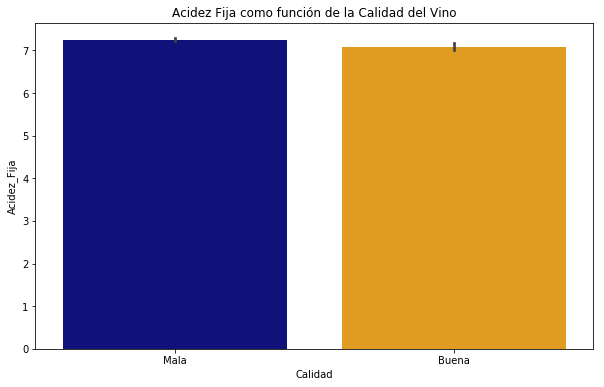

In [122]:
cm_surv = ["darkblue" , "orange"]
img1 = plt.figure(figsize = (10,6))
sns.barplot(x='Calidad', y='Acidez_Fija', data=wineX, palette=cm_surv)
plt.title("Acidez Fija como función de la Calidad del Vino")
plt.show()
   

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


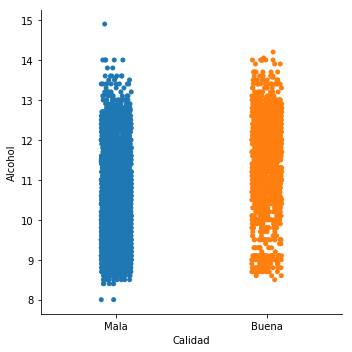

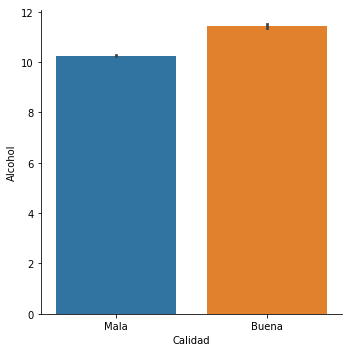

In [98]:
plot('Alcohol','Calidad')

**Comentarios:** Vemos que la acidez fija no da ninguna especificación para clasificar la calidad.

**Acidez Vólatil vs Calidad:**

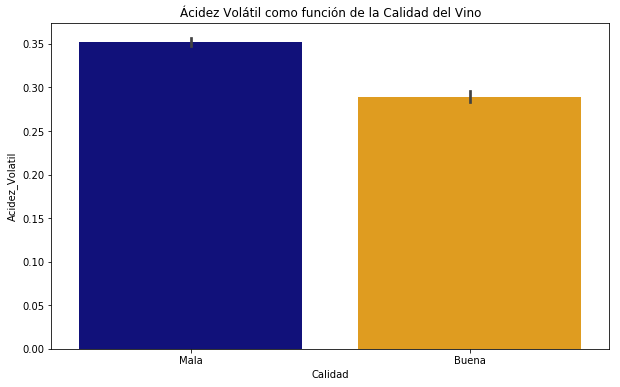

In [123]:
#img2 = plt.figure(figsize = (10,6))
#sns.barplot(x = 'Calidad', y = 'Acidez_Volatil', data = wineX)

cm_surv = ["darkblue" , "orange"]
img2 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Acidez_Volatil', data = wineX, palette=cm_surv)
plt.title("Ácidez Volátil como función de la Calidad del Vino")
plt.show()

**Comentarios:** Se observa una tendencia bastante descendente en la acidez volátil a medida que aumentamos la calidad.

**Ácido Citrico vs Calidad:**

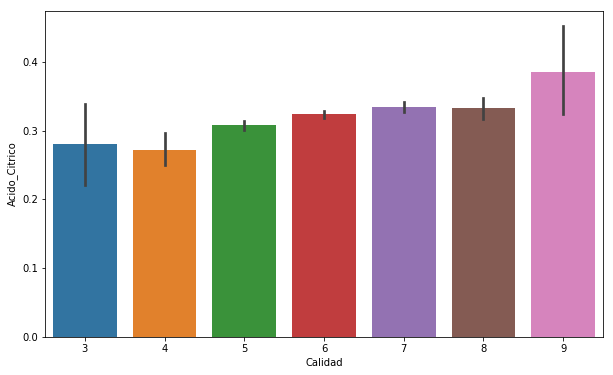

In [27]:
img3 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Acido_Citrico', data = wineX)



**Comentarios**: La composición del ácido cítrico aumenta a medida que avanzamos en la calidad del vino.

**Azúcar Residual vs Calidad: **

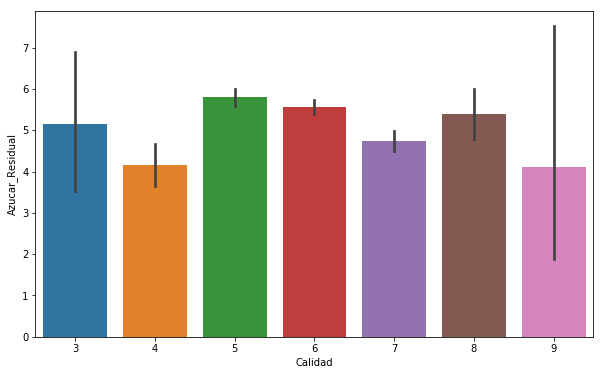

In [28]:
img4 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Azucar_Residual', data = wineX)

**Comentarios:** Vemos que la Azúcar Residual no da ninguna especificación para clasificar la calidad.

**Sal vs Calidad:**

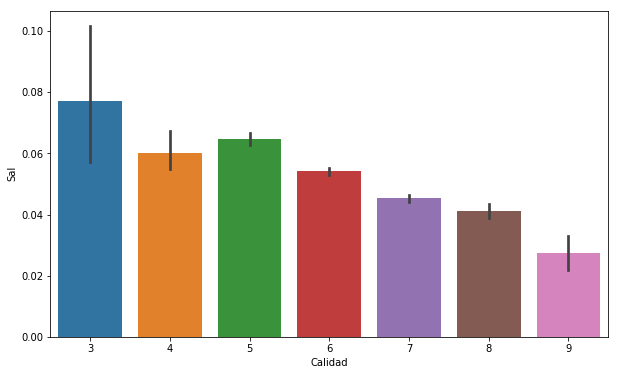

In [29]:
img5 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Sal', data = wineX)

**Comentarios**: La composición del cloruro también disminuye a medida que avanzamos en la calidad del vino.

**Dioxido Sulfuro Libres vs Calidad:**

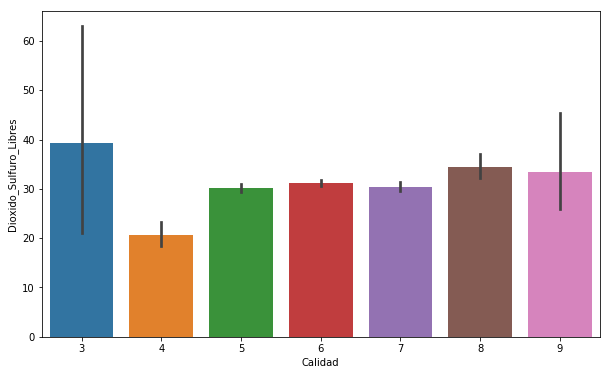

In [30]:
img6 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Dioxido_Sulfuro_Libres', data = wineX)

**Comentarios**: Vemos que la Dióxido de Sulfuro Libre no es de mucho aporte para clasificar la calidad. Puede existir vinos de baja y de alta calidad con elevadas concentraciones de dioxodo de sulfuro libres.

**Dióxido Sulfuro Total vs Calidad:**

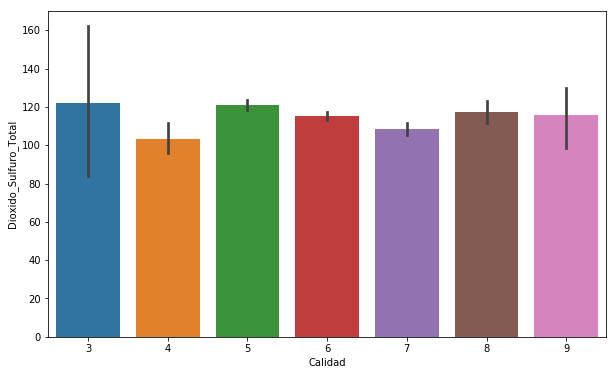

In [31]:
img7 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Dioxido_Sulfuro_Total', data = wineX)

**Densidad vs Calidad:**

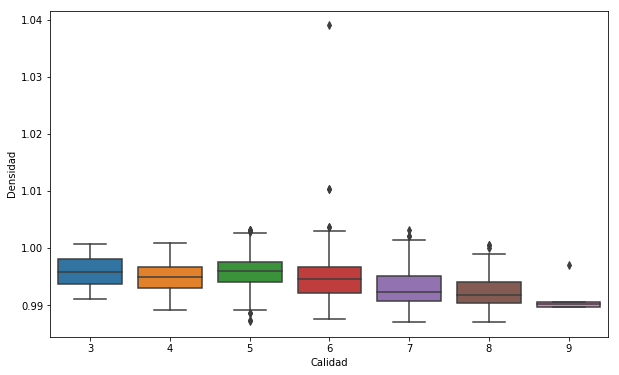

In [52]:
img8 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Densidad', data = wineX)

Text(0, 0.5, 'Densidad')

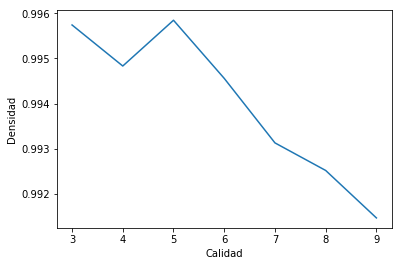

In [54]:
wineX.groupby('Calidad')['Densidad'].mean().plot.line()
plt.ylabel("Densidad")

**Comentarios**: En el gráfico lineal se aprecia mejor como la Densidad tiene una relacion inversa con la Calidad.

**pH vs Calidad:**

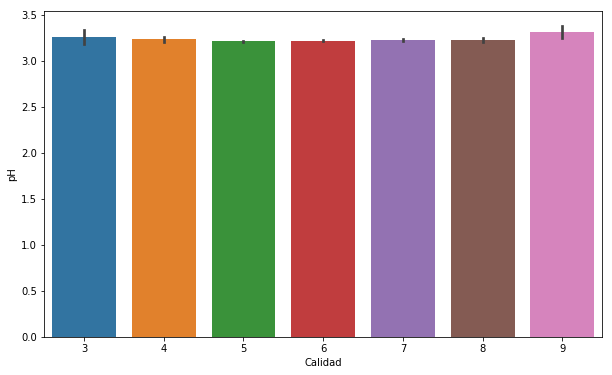

In [35]:
img9 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'pH', data = wineX)

**Comentarios**: Vemos que el pH tampoco es de mucho aporte para clasificar la calidad. 

**Sulfatos vs Calidad:**

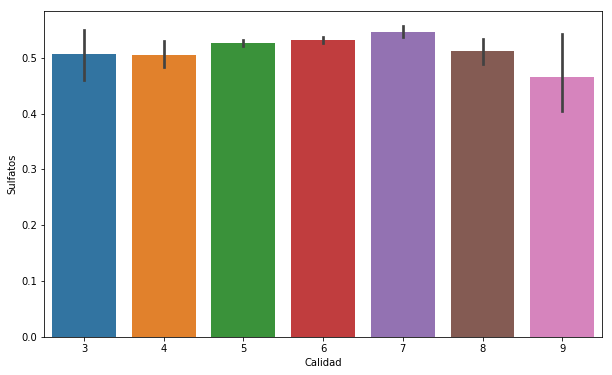

In [36]:
img10 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Sulfatos', data = wineX)


**Comentarios**: El nivel de sulfatos aumenta con la calidad del vino.

**Alcohol vs Calidad: **

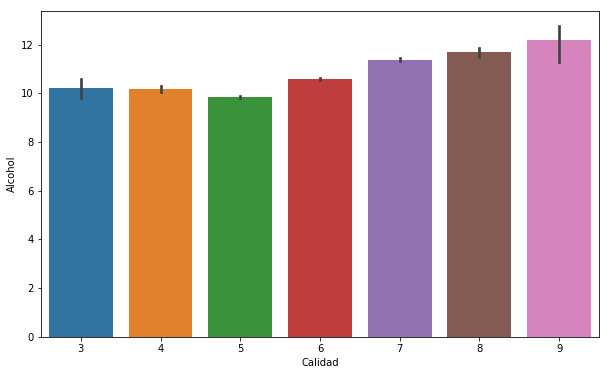

In [37]:
img11 = plt.figure(figsize = (10,6))
sns.barplot(x = 'Calidad', y = 'Alcohol', data = wineX)

**Comentarios**: El nivel de alcohol también aumenta a medida que aumenta la calidad del vino.

**Mapa de Calor (Correlation Heatmap):**

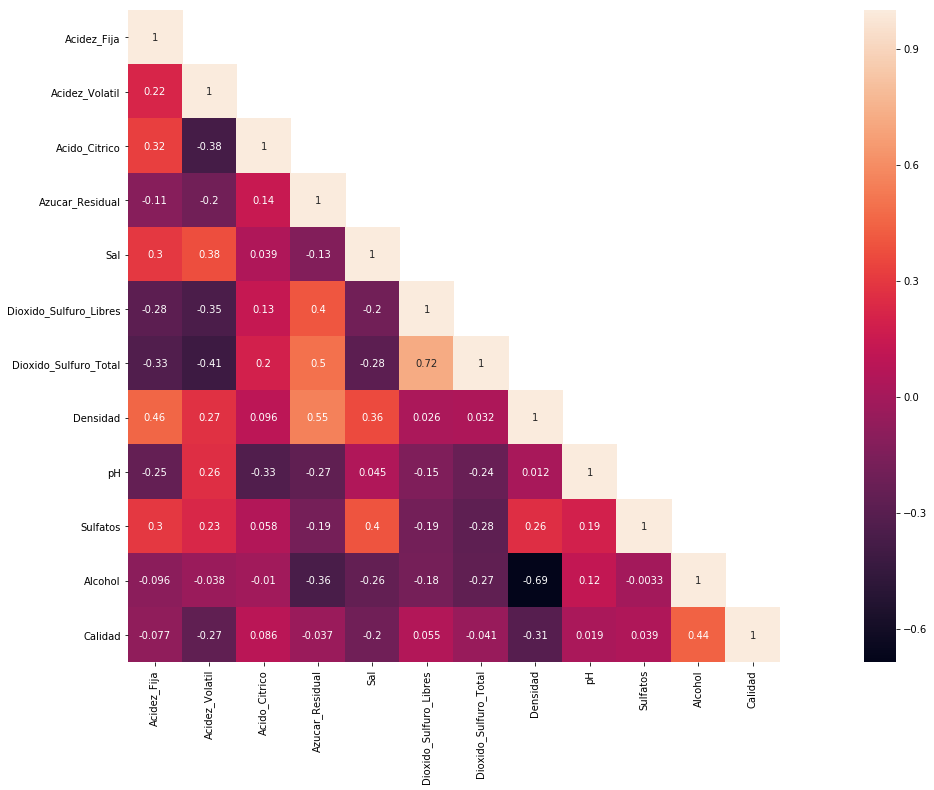

In [49]:
#Pintamos la correlacion entre variables
corr_map= wineX.corr()
mask = np.array(corr_map)
mask[np.tril_indices_from(mask)] = False
img=plt.gcf()
img.set_size_inches(30,12)
sns.heatmap(data=corr_map,mask=mask,square=True,annot=True,cbar=True)


**Comentarios:** Una cosa que la gráfica de correlación nos dice es que hay muy pocas características fuertemente correlacionadas entre sí. Desde el punto de vista de incluir estas características en nuestros modelos ML, esto significa que no hay mucha información redundante, y que cada característica lleva consigo información única. No obstante:

- La variable dependiente "Calidad" del vino está altamente relacionada con el "Alcohol". Más que cualquier otra variable, el "Alcohol" es la que más correlacionada con la "Calidad" en un 0.44. Fuertemente relacionadas pero de manera inversa, también tenemos el "Alcohol" y la "Densidad" en -0.69. Por tanto, podemos centrarnos en las relaciones de calidad-alcohol y las relaciones densidad-alcohol para obtener una exploración significativa. 

- Otras relaciones directas que podemos ver con el mapa de calor, son:
       "Dióxido de Sulfuro Total" con "Dióxido de Sulfuro Libres"; 
       "Ácidez Fija" con "Densidad" y "Ácido Cítrico"; 
       "Azúcar Residual" con "Densidad" y "Dióxido de Sulfuro Total"; 

- El pH está altamente relacionado de manera inversa con el "Ácido Cítrico" y la "Ácidez Fija", lo cual se esperaba ya que sabemos que los ácidos tienen valores de pH mucho más pequeños.

- El "Azúcar Residual", el "Dióxido de Sulfuro Total", y la "Ácidez Fija", tienen baja correlacion con la "calidad".

- La auto-relación, es decir, de una característica para sí misma es 1 como se esperaba.

-
-

- Una opción podría ser eliminar algunas características altamente relacionadas, aunque en nuestro caso nos quedaramos con ellas para observar los resultados. 



In [0]:
fig,ax = plt.subplots(2,1, figsize=(12,6))             
plt.suptitle("Distribución de Variables más Correlacionadas con la Calidad", fontsize=10)
sns.barplot(x = 'Calidad', y = 'Alcohol', data = wineX, palette="Reds",ax = ax[0,0])
sns.jointplot(y=df["Densidad"],x=df["Alcohol"],kind="hex",ax = ax[1,0])
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

## Parte 3- Pre-procesado de los Datos para aplicar Algoritmos de Machine Learning


In [0]:
#Librerias a utilizar
from sklearn.preprocessing import LabelEncoder

A continuación realizaremos una clasificación para la variable de respuesta 'Calidad'. Para ello reemplazamos los valores númericos enteros de la columna 'Calidad' por las categorias 'Buena', 'Aceptable' o 'Mala'. Daremos el límite a la calidad basándonos en los valores obtenidos en la parte 2 del proyecto, para el promedio, el percentil 25, 50 y 75 de la columna 'Calidad'.

In [125]:
wineX['Calidad'].describe()

count     6492
unique       2
top       Mala
freq      5220
Name: Calidad, dtype: object

In [0]:
val, base = np.histogram(wineX['Calidad'], bins=20)
Acumulado = np.cumsum(val/wineX.shape[0])
plt.plot(base[:-1], Acumulado, c='blue')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

Dado que la mediana para la 'Calidad' es 6, y el promedio está entre 5 y 6; clasificamos el vino como 'Malo' si la calidad es menor o igual a 4, 'Aceptable' si la calidad es de 5 ó 6, y de lo contrario, clasificamos el vino como 'Bueno'. 


In [0]:
quality = df["Calidad"].values
categoria = []
for num in quality:
    if num<5:
        category.append("Malo")
    elif num>6:
        category.append("Bueno")
    else:
        category.append("Aceptable")

In [0]:
binx = (2, 6.5, 8)
quality_name = ['Mala', 'Buena']
wineX['Calidad'] = pd.cut(wineX['Calidad'], bins = binx, labels = quality_name)

In [59]:
wineX.head()

,Tipo,Acidez_Fija,Acidez_Volatil,Acido_Citrico,Azucar_Residual,Sal,Dioxido_Sulfuro_Libres,Dioxido_Sulfuro_Total,Densidad,pH,Sulfatos,Alcohol,Calidad
0,Blanco,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,Mala
1,Blanco,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,Mala
2,Blanco,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,Mala
3,Blanco,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Mala
4,Blanco,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,Mala


In [64]:
#Echamos un vistazo de como ha quedado la distribución de "Mala" y "Buena" Calidad
wineX['Calidad'].value_counts()

Mala     5220
Buena    1272
Name: Calidad, dtype: int64

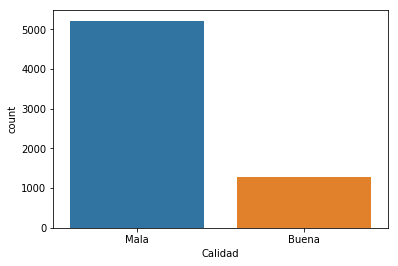

In [65]:
sns.countplot(wineX['Calidad'])

In [0]:
#Asignamos etiquetas a la variable "Calidad"
etiqueta_quality = LabelEncoder()

In [0]:
#"Malo" será 0 y "Bueno" será 1 
wineX['Calidad'] = etiqueta_quality.fit_transform(wineX['Calidad'])